<a href="https://colab.research.google.com/github/smlra-kjsce/Pytorch-101-2023/blob/main/Tensor_Basics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tensor Basics
This section covers:
* Converting NumPy arrays to PyTorch tensors
* Creating tensors from scratch



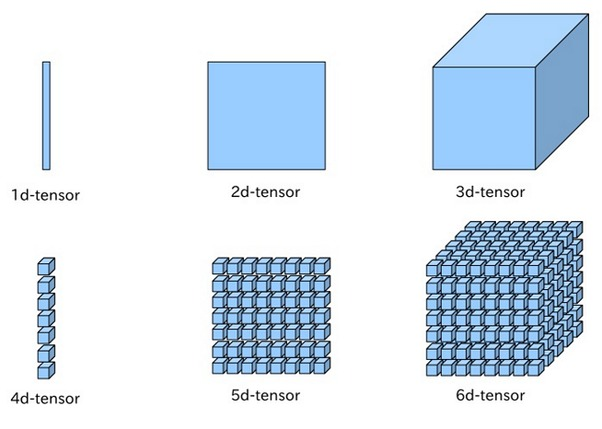

## Perform standard imports

In [1]:
import torch
import numpy as np

In [2]:
torch.__version__

'1.13.1+cu116'

## Converting NumPy arrays to PyTorch tensors
A <a href='https://pytorch.org/docs/stable/tensors.html'><strong><tt>torch.Tensor</tt></strong></a> is a multi-dimensional matrix containing elements of a single data type.<br>
Calculations between tensors can only happen if the tensors share the same dtype.<br>
In some cases tensors are used as a replacement for NumPy to use the power of GPUs.

In [3]:
arr = np.array([1,2,3,4,5])
print(arr)
print(arr.dtype)
print(type(arr))

[1 2 3 4 5]
int64
<class 'numpy.ndarray'>


In [4]:
x = torch.from_numpy(arr)
# Equivalent to x = torch.as_tensor(arr)

print(x)

tensor([1, 2, 3, 4, 5])


In [5]:
# Print the type of data held by the tensor
print(x.dtype)

torch.int64


In [6]:
# Print the tensor object type
print(type(x))
print(x.type()) # this is more specific!

<class 'torch.Tensor'>
torch.LongTensor


In [7]:
arr2 = np.arange(0.,12.).reshape(4,3)
print(arr2)
print()
print(arr2.dtype)

[[ 0.  1.  2.]
 [ 3.  4.  5.]
 [ 6.  7.  8.]
 [ 9. 10. 11.]]

float64


In [8]:
x2 = torch.from_numpy(arr2)
print(x2)
print()
print(x2.type())

tensor([[ 0.,  1.,  2.],
        [ 3.,  4.,  5.],
        [ 6.,  7.,  8.],
        [ 9., 10., 11.]], dtype=torch.float64)

torch.DoubleTensor


<h2><a href='https://pytorch.org/docs/stable/tensors.html'>Tensor Datatypes</a></h2>
<table style="display: inline-block">
<tr><th>TYPE</th><th>NAME</th><th>EQUIVALENT</th><th>TENSOR TYPE</th></tr>
<tr><td>32-bit integer (signed)</td><td>torch.int32</td><td>torch.int</td><td>IntTensor</td></tr>
<tr><td>64-bit integer (signed)</td><td>torch.int64</td><td>torch.long</td><td>LongTensor</td></tr>
<tr><td>16-bit integer (signed)</td><td>torch.int16</td><td>torch.short</td><td>ShortTensor</td></tr>
<tr><td>32-bit floating point</td><td>torch.float32</td><td>torch.float</td><td>FloatTensor</td></tr>
<tr><td>64-bit floating point</td><td>torch.float64</td><td>torch.double</td><td>DoubleTensor</td></tr>
<tr><td>16-bit floating point</td><td>torch.float16</td><td>torch.half</td><td>HalfTensor</td></tr>
<tr><td>8-bit integer (signed)</td><td>torch.int8</td><td></td><td>CharTensor</td></tr>
<tr><td>8-bit integer (unsigned)</td><td>torch.uint8</td><td></td><td>ByteTensor</td></tr></table>

Here <tt>torch.DoubleTensor</tt> refers to 64-bit floating point data.

## Copying vs. sharing

<a href='https://pytorch.org/docs/stable/torch.html#torch.from_numpy'><strong><tt>torch.from_numpy()</tt></strong></a><br>
<a href='https://pytorch.org/docs/stable/torch.html#torch.as_tensor'><strong><tt>torch.as_tensor()</tt></strong></a><br>
<a href='https://pytorch.org/docs/stable/torch.html#torch.tensor'><strong><tt>torch.tensor()</tt></strong></a><br>

There are a number of different functions available for <a href='https://pytorch.org/docs/stable/torch.html#creation-ops'>creating tensors</a>. When using <a href='https://pytorch.org/docs/stable/torch.html#torch.from_numpy'><strong><tt>torch.from_numpy()</tt></strong></a> and <a href='https://pytorch.org/docs/stable/torch.html#torch.as_tensor'><strong><tt>torch.as_tensor()</tt></strong></a>, the PyTorch tensor and the source NumPy array share the same memory. This means that changes to one affect the other. However, the <a href='https://pytorch.org/docs/stable/torch.html#torch.tensor'><strong><tt>torch.tensor()</tt></strong></a> function always makes a copy.

In [9]:
# Using torch.from_numpy()
arr = np.arange(0,5)
t = torch.from_numpy(arr)
print(t)

tensor([0, 1, 2, 3, 4])


In [10]:
arr[2]=77
print(t)
t[1] = 10
print(arr)

tensor([ 0,  1, 77,  3,  4])
[ 0 10 77  3  4]


In [11]:
# Using torch.tensor()
arr = np.arange(0,5)
t = torch.tensor(arr)
print(t)

tensor([0, 1, 2, 3, 4])


In [12]:
arr[2]=77
print(t)

tensor([0, 1, 2, 3, 4])


## Class constructors
<a href='https://pytorch.org/docs/stable/tensors.html'><strong><tt>torch.Tensor()</tt></strong></a><br>
<a href='https://pytorch.org/docs/stable/tensors.html'><strong><tt>torch.FloatTensor()</tt></strong></a><br>
<a href='https://pytorch.org/docs/stable/tensors.html'><strong><tt>torch.LongTensor()</tt></strong></a>, etc.<br>

There's a subtle difference between using the factory function <font color=orange><tt>torch.tensor(data)</tt></font> and the class constructor <font color=orange><tt>torch.Tensor(data)</tt></font>.<br>
The factory function determines the dtype from the incoming data, or from a passed-in dtype argument.<br>
The class constructor <tt>torch.Tensor()</tt>is simply an alias for <tt>torch.FloatTensor(data)</tt>. Consider the following:

In [13]:
data = np.array([1,2,3])

In [14]:
a = torch.Tensor(data)  # Equivalent to cc = torch.FloatTensor(data)
print(a, a.type())

tensor([1., 2., 3.]) torch.FloatTensor


In [15]:
b = torch.tensor(data)
print(b, b.type())

tensor([1, 2, 3]) torch.LongTensor


In [16]:
c = torch.tensor(data, dtype=torch.int)
print(c, c.type())

tensor([1, 2, 3], dtype=torch.int32) torch.IntTensor


## Creating tensors from scratch

### Initialized tensors with <tt>.zeros()</tt> and <tt>.ones()</tt>
<a href='https://pytorch.org/docs/stable/torch.html#torch.zeros'><strong><tt>torch.zeros(size)</tt></strong></a><br>
<a href='https://pytorch.org/docs/stable/torch.html#torch.ones'><strong><tt>torch.ones(size)</tt></strong></a><br>
It's a good idea to pass in the intended dtype.

In [17]:
x = torch.zeros(4, 3, dtype=torch.int64)
print(x)

tensor([[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]])


In [18]:
x = torch.ones(4, 3, dtype=torch.int64)
print(x)

tensor([[1, 1, 1],
        [1, 1, 1],
        [1, 1, 1],
        [1, 1, 1]])


### Tensors from ranges
<a href='https://pytorch.org/docs/stable/torch.html#torch.arange'><strong><tt>torch.arange(start,end,step)</tt></strong></a><br>
<a href='https://pytorch.org/docs/stable/torch.html#torch.linspace'><strong><tt>torch.linspace(start,end,steps)</tt></strong></a><br>
Note that with <tt>.arange()</tt>, <tt>end</tt> is exclusive, while with <tt>linspace()</tt>, <tt>end</tt> is inclusive.

In [19]:
x = torch.arange(0,18,2) # [0,18) [start,stop,step]
print(x)

tensor([ 0,  2,  4,  6,  8, 10, 12, 14, 16])


In [20]:
x = torch.linspace(0,18,12)
print(x)

tensor([ 0.0000,  1.6364,  3.2727,  4.9091,  6.5455,  8.1818,  9.8182, 11.4545,
        13.0909, 14.7273, 16.3636, 18.0000])


### Changing the dtype of existing tensors

In [21]:
print('Old:', x.type())

x = x.type(torch.int64)

print('New:', x.type())
print(x)

Old: torch.FloatTensor
New: torch.LongTensor
tensor([ 0,  1,  3,  4,  6,  8,  9, 11, 13, 14, 16, 18])


### Random number tensors
<a href='https://pytorch.org/docs/stable/torch.html#torch.rand'><strong><tt>torch.rand(size)</tt></strong></a> returns random samples from a uniform distribution over [0, 1)<br>
<a href='https://pytorch.org/docs/stable/torch.html#torch.randn'><strong><tt>torch.randn(size)</tt></strong></a> returns samples from the "standard normal" distribution [σ = 1] [μ=0
]<br>
&nbsp;&nbsp;&nbsp;&nbsp;Unlike <tt>rand</tt> which is uniform, values closer to zero are more likely to appear.<br>
<a href='https://pytorch.org/docs/stable/torch.html#torch.randint'><strong><tt>torch.randint(low,high,size)</tt></strong></a> returns random integers from low (inclusive) to high (exclusive)

In [22]:
x = torch.rand(4, 3)
print(x)

tensor([[0.7283, 0.2324, 0.8404],
        [0.0990, 0.5903, 0.3747],
        [0.5832, 0.3576, 0.3326],
        [0.1682, 0.7969, 0.2899]])


In [23]:
x = torch.randn(4, 3)
print(x)

tensor([[ 2.1118,  0.0788,  0.3945],
        [-0.0558, -0.8005, -0.4475],
        [-0.4503, -1.4099,  0.6201],
        [ 0.3506, -0.4905,  0.9646]])


In [24]:
x = torch.randint(0,5,(4,3))
print(x)

tensor([[3, 4, 1],
        [0, 0, 1],
        [1, 1, 3],
        [3, 0, 4]])


### Setting the random seed
<a href='https://pytorch.org/docs/stable/torch.html#torch.manual_seed'><strong><tt>torch.manual_seed(int)</tt></strong></a> is used to obtain reproducible results

In [25]:
x = torch.rand(2, 3)
print(x)

tensor([[0.4440, 0.9492, 0.5047],
        [0.3330, 0.8693, 0.1494]])


In [26]:
torch.manual_seed(10)
x = torch.rand(2, 3)
print(x)

tensor([[0.4581, 0.4829, 0.3125],
        [0.6150, 0.2139, 0.4118]])


## Tensor attributes
Besides <tt>dtype</tt>, we can look at other <a href='https://pytorch.org/docs/stable/tensor_attributes.html'>tensor attributes</a> like <tt>shape</tt>, <tt>device</tt> and <tt>layout</tt>

In [27]:
x.shape

torch.Size([2, 3])

In [28]:
x.size()  # equivalent to x.shape

torch.Size([2, 3])

In [29]:
x.device

device(type='cpu')